#1 For the K-means algorithm using two attributes namely average_runs and bowling_economy, which you wrote in assignment-1, extend it with different strategies (take at least two strategies) for initial choice of cluster centroid. Take K=2.   

(a) Which strategy achieves better convergence (iterations count) ? Draw bar plot (X-axis has different strategies and Y-axis has iterations count).  [2 points]    

(b) Is it true for other values of K = 3,4,5,6 ? On the same bar plot, draw bars with different colors for these different values of K. [2 points]         

#2 Use the elbow method to find the best value of K. Consider four attributes runs_scored, average_runs, wickets_obtained, bowling_economy.   Plot the related graph as discussed in the video lecture. [2 points]

#3 Your task is to create a team comprising 4 batsmen, 4 bowlers, and 3 all-rounders.  Use appropriate K value. Consider two attributes runs_scored and wickets_obtained. Take the criteria for selecting top batsmen on the basis of runs_scored, top bowlers on the basis of wickets_obtained and top all-rounders on the basis of average of runs_scored and wickets_obtained.  

(a) Output the names of cricketers who got selected in your team. [2 points]    

(b) Draw a scatter plot with runs_scored and wickets_obtained on X-axis and Y-axis, respectively. Each selected cricketer as a data point (solid circle), use different colors for batsman, bowler and all-rounder.   [2 points]

#4 Refer to this notebook (GMM), perform on cricketers dataset, use runs_scored and wickets_obtained as the attributes. [Not to be graded]. This question (#4) is for your self-learning.

Deliverables: For questions to be graded, Q1-Q3, paste plot diagrams in a single document file and related code in single jupyter notebook.

For any query, write to me at rishabh.kaushal@wilp.bits-pilani.ac.in

In [82]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use
plt.style.use('ggplot')
import seaborn as sns
import random

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler

In [83]:
data = pd.read_csv('cricketers.csv', delimiter='\t')
data.sample(10)

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
51,Mandeep Singh,14,13,252,47,186,25.20,135.48,0,0.0,0,0,0.00,0.00
19,Colin Munro,5,5,63,33,41,12.60,153.65,0,0.0,0,0,0.00,0.00
40,Jos Buttler,13,13,548,95,353,54.80,155.24,0,0.0,0,0,0.00,0.00
10,Ben Stokes,13,13,196,45,161,16.33,121.73,12,37.0,303,8,37.87,8.18
99,Yuvraj Singh,8,6,65,20,73,10.83,89.04,2,2.0,23,0,-0.00,11.50
42,Kane Williamson,17,17,735,84,516,52.50,142.44,0,0.0,0,0,0.00,0.00
17,Chris Woakes,5,4,17,11,19,8.50,89.47,5,18.2,190,8,23.75,10.36
91,Suryakumar Yadav,14,14,512,72,384,36.57,133.33,0,0.0,0,0,0.00,0.00
15,Chris Lynn,16,16,491,74,377,32.73,130.23,0,0.0,0,0,0.00,0.00
80,Shane Watson,15,15,555,117,359,39.64,154.59,11,28.0,251,6,41.83,8.96


In [84]:
data = data.drop(columns='PLAYER')

In [85]:
data.shape

(109, 13)

In [86]:
data.dtypes

matches_played                int64
innings_batted                int64
runs_scored                   int64
highest_runs                  int64
balls_faced                   int64
average_runs                float64
strike_rate                 float64
innings_bowled                int64
overs                       float64
runs_given                    int64
wickets_obtained              int64
average_runs_per_wicket     float64
bowling_economy             float64
dtype: object

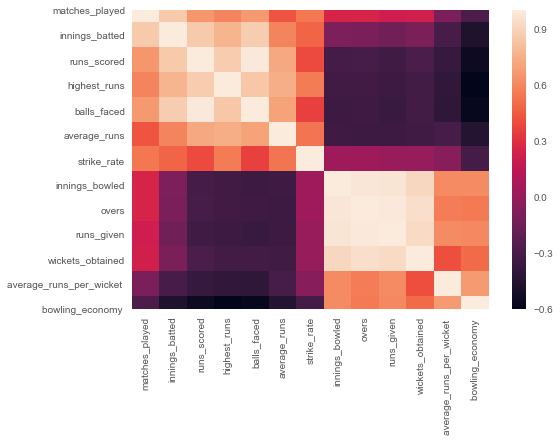

In [87]:
#Finding correlation
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [88]:
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data),columns = data.columns)

data_scaled.head(10)

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.085717,0.223846,-0.218342,0.084349,-0.200401,-0.350205,0.449633,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
1,0.475017,0.627139,1.687804,1.566174,1.221188,1.933268,1.081234,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
2,-1.276831,-0.986033,-0.609488,0.084349,-0.744667,2.536909,1.419576,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
3,1.058966,1.232079,1.081804,0.724228,1.529876,0.380781,-0.083732,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
4,-0.692881,-0.381094,-0.141215,0.050671,-0.054181,0.143570,0.065379,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
5,1.253615,1.635372,2.359913,1.902952,2.252856,1.288427,0.568550,-0.832122,-0.758809,-0.788506,-0.704155,-0.794810,-1.083832
6,1.253615,1.232079,0.784313,1.498818,0.376358,0.397011,1.293215,1.933161,1.289149,1.545407,1.627125,0.456905,0.890286
7,0.864316,0.022200,-0.780269,-0.993342,-0.704050,-1.063088,-0.786889,1.748809,2.299475,2.156826,3.599746,0.060758,0.599851
8,-0.108932,0.022200,-0.515833,-0.824953,-0.452226,-0.563695,-0.130678,0.642696,0.661109,0.644714,-0.166167,2.536678,0.679826
9,-0.108932,-0.381094,-0.427688,-0.218751,-0.541583,0.102370,0.894483,0.458343,0.169599,0.315994,-0.345497,3.056621,0.995516


In [89]:
X = data_scaled.iloc[:,[5,12]].values
X

array([[-3.50204799e-01, -1.08383228e+00],
       [ 1.93326794e+00, -1.08383228e+00],
       [ 2.53690876e+00, -1.08383228e+00],
       [ 3.80781143e-01, -1.08383228e+00],
       [ 1.43569650e-01, -1.08383228e+00],
       [ 1.28842722e+00, -1.08383228e+00],
       [ 3.97011403e-01,  8.90285973e-01],
       [-1.06308776e+00,  5.99850665e-01],
       [-5.63695142e-01,  6.79825605e-01],
       [ 1.02369759e-01,  9.95516157e-01],
       [-3.76422911e-01,  6.37733531e-01],
       [-9.90051588e-01,  5.28294140e-01],
       [-7.49146194e-02, -1.08383228e+00],
       [ 1.64793836e-01,  8.60821521e-01],
       [ 1.15608818e+00, -1.08383228e+00],
       [ 6.47331952e-01, -1.08383228e+00],
       [ 1.47569945e+00,  1.06496808e+00],
       [-8.65203434e-01,  1.09653713e+00],
       [ 2.39702729e-01,  7.26126886e-01],
       [-6.09264719e-01, -1.08383228e+00],
       [-1.04248781e+00,  1.70687220e+00],
       [-3.70804744e-01,  2.48381851e-01],
       [-5.84295088e-01,  7.11394660e-01],
       [ 9.

In [90]:
X.shape

(109, 2)

In [91]:
# Let us use Kmeans++ as first initialization technique:
from sklearn.cluster import KMeans
kmeans_initplus = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=500).fit(X)
kmeans_initplus

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
kmeans_initplus.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
centroidsplus = kmeans_initplus.cluster_centers_
centroidsplus

array([[ 0.5477974 , -1.04285693],
       [-0.44736787,  0.8516665 ]])

In [94]:
# Let us use random as second initialization technique:
kmeans_initrand = KMeans(init='random', n_clusters=2, n_init=10).fit(X)

In [95]:
kmeans_initrand.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
centroidsrand = kmeans_initrand.cluster_centers_
centroidsrand

array([[ 0.5477974 , -1.04285693],
       [-0.44736787,  0.8516665 ]])

(b) Is it true for other values of K = 3,4,5,6 ? On the same bar plot, draw bars with different colors for these different values of K. [2 points]  

In [97]:
from sklearn.cluster import KMeans
kmeans_three = KMeans(init='k-means++', n_clusters=3, n_init=10, max_iter=500).fit(X)
kmeans_three

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
from sklearn.cluster import KMeans
kmeans_four = KMeans(init='k-means++', n_clusters=4, n_init=10, max_iter=500).fit(X)
kmeans_four

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
from sklearn.cluster import KMeans
kmeans_five = KMeans(init='k-means++', n_clusters=5, n_init=10, max_iter=500).fit(X)
kmeans_five

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Use the elbow method to find the best value of K. Consider four attributes runs_scored, average_runs, wickets_obtained, bowling_economy.  
Plot the related graph as discussed in the video lecture. [2 points]

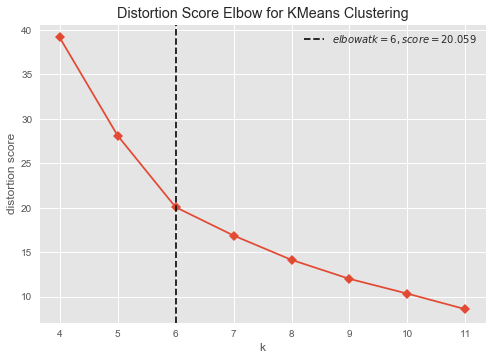

In [100]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), timings=False
)
visualizer.fit(X)
visualizer.show()

#3 Your task is to create a team comprising 4 batsmen, 4 bowlers, and 3 all-rounders.  Use appropriate K value. Consider two attributes runs_scored and wickets_obtained. Take the criteria for selecting top batsmen on the basis of runs_scored, top bowlers on the basis of wickets_obtained and top all-rounders on the basis of average of runs_scored and wickets_obtained.  

In [101]:
X = data_scaled.iloc[:,[2]].values

In [102]:
K = 2  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

print(Centroids)

[[-0.2348693  -0.41116026]]


In [103]:
X = data_scaled.iloc[:,[10]].values

K = 2  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

print(Centroids)

[[ 0.90980778 -0.70415503]]


In [104]:
pwd

'C:\\Users\\sharmg1\\Desktop\\Desktop Backup-v1\\AI-ML\\Bits Pilani\\Unsupervised Learning\\Ass-2'